# Central Limit Theorem (CLT): Why It Matters in ML

---

## 1. The Core Idea
The Central Limit Theorem (CLT) says:

If you take a large number of independent random samples from any population (doesn’t matter the original distribution — skewed, uniform, etc.), then the sampling distribution of the mean will approach a Normal Distribution (bell curve) as the sample size grows.

---

## 2. Why is this useful in ML?
Many machine learning algorithms assume normality (Gaussian distributions).

Thanks to CLT, we can safely use confidence intervals, hypothesis testing, p-values, even if the original data isn’t normal.

**Example:** In A/B testing, you test averages (click-through rates, revenue, etc.) → CLT tells you the averages behave like a normal distribution.

---

## 3. The Math
Suppose we have random variables $X_1, X_2, ..., X_n$ with:
- mean $\mu$
- variance $\sigma^2$

Take their sample mean:

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i
$$

Then CLT says:

$$
\frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} \to N(0, 1)
$$

As $n \to \infty$, the distribution of the standardized sample mean becomes a standard normal distribution.

---

## 4. Intuition with an Example
Imagine rolling a die 🎲 (uniform distribution, not normal).
- One roll: distribution is flat (1 to 6 equally likely).
- Average of 2 rolls: distribution starts to curve.
- Average of 30 rolls: looks like a bell curve (normal).

So the more samples you average, the more the distribution of the mean looks normal, no matter what the original shape was.

---

## 5. Why it Matters for ML
CLT gives the theoretical backbone for using Gaussian assumptions in many models (e.g., linear regression, logistic regression approximations).

It lets us approximate probabilities and build confidence intervals for model evaluation.


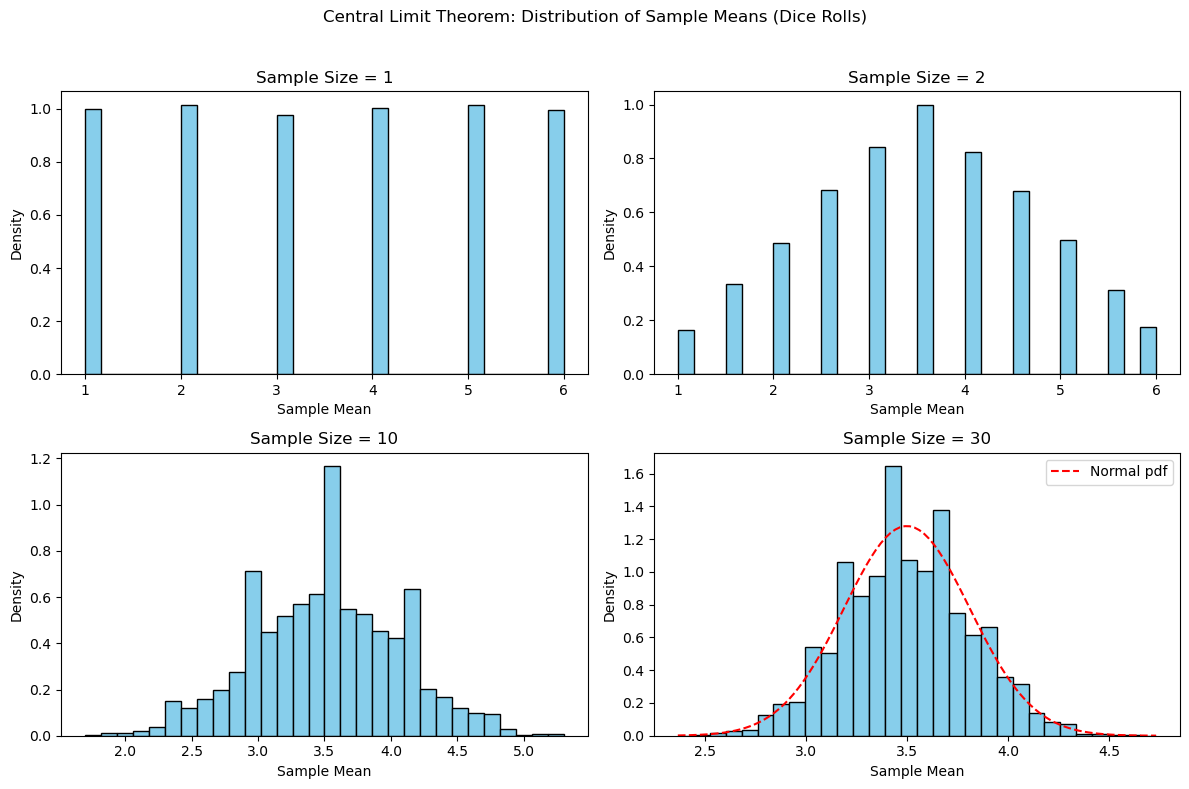

In [3]:
# Central Limit Theorem Example: Dice Rolls Simulation
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 10000
sample_sizes = [1, 2, 10, 30]

plt.figure(figsize=(12, 8))
for i, n in enumerate(sample_sizes, 1):
    means = [np.mean(np.random.randint(1, 7, n)) for _ in range(n_samples)]
    plt.subplot(2, 2, i)
    plt.hist(means, bins=30, color='skyblue', edgecolor='k', density=True)
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    if n == 30:
        # Overlay normal curve for large n
        from scipy.stats import norm
        mu, sigma = 3.5, np.sqrt(35/12/n)  # mean and std for dice
        x = np.linspace(min(means), max(means), 100)
        plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Normal pdf')
        plt.legend()
plt.suptitle('Central Limit Theorem: Distribution of Sample Means (Dice Rolls)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
